# Business case: Understanding profitability in the US financial market
* Manolo Ramírez Pintor
* A01706155

This is business case prepared for the Statistics Module (Bloque 1) of the Advanced AI concentration

### 1 Case Description
You were hired as a data scientist in an important mutual fund firm in the department of financial analysis. The firm has been doing financial analysis and financial forecast for several years. You were hired to come up with alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

You have to analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. You will receive this dataset in a .csv format.

You have to carefully read the data dictionary to understand each variable and the dataset to understand its structure.

In [94]:
# Importing the libraries to use:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
# Findind the route to the .csv files and opening them
us = pd.read_csv('./datasets/us2022q2a.csv') # US data
firms = pd.read_csv('./datasets/usfirms2022.csv') # US Firms data

In [96]:
us

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0


In [97]:
firms

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-
...,...,...,...,...,...,...,...,...,...,...,...
3603,ZUO,"Zuora, Inc",3604,Com A,US,Stock,Information,NYSE,Software & Data,Software Publishers,-
3604,ZWS,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3605,ZY,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",3607,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [98]:
# Merge both tables
us_merged = us.merge(firms, left_on='firm', right_on='Ticker')

### 2 Business Questions
All your data and statistical analysis has to be tailored to respond the following questions:

#### 2.1 General questions:
1. By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?


In [99]:
us

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,512000.000,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,528000.000,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,830000.000,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,556000.000,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,207.635,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0



2. Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

#### 2.2 Specific questions:

##### 2.2.1 About descriptive statistics:

**2.2.1.1 Considering the most recent financial quarter of the dataset:**

* Show how many firms by industry there are in the sample


> ¿Por qué algunas columnas tienen un salto de línea? ._.xD

In [100]:
firms['Sector NAICS\nlevel 1'].value_counts()

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

* For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

Tutorial de Markdown: https://commonmark.org/help/

**TO KNOW THAT INFORMATION, FIRST WE SHOULD WORK WITH THE DATA OF BOTH TABLES TO GET SOME CALCULATION BETWEEN BOTH DATASETS AND THE ANSWERS**

**WE CAN GET MORE INFORMATION WHEN USING THE FOLLOWING FORMULAS TO GET VARIABLE CALCULATIONS**

![Formulas prof 0](./images/formulas_2.jpeg)
![Formulas prof 1](./images/formulas_1.PNG)
![Formulas prof 3](./images/formulas_3.PNG)


In [101]:
# Get Firm sizes and store them on a 'Book value' var:
us_merged['Book value'] = us_merged['totalassets'] - us_merged['totalliabilities']

# Get Market values and store them on a 'Market value' var:
us_merged['Market value'] = us_merged['originalprice'] * us_merged['sharesoutstanding']

# Get the Progit Margin of the mesasures taken (ebit) and store it on 'Operating Profit' var:
us_merged['Operating profit'] = us_merged['revenue'] - us_merged['cogs'] - us_merged['sgae'] - us_merged['otheropexp']

# Get the Operating Profit Margin and store it on 'OPM' var:
us_merged['opm'] = us_merged['Operating profit'] / us_merged['revenue']

# Get the Net Income and store it on 'Net income' var:
us_merged['Net income'] = us_merged['Operating profit'] - us_merged['incometax'] - us_merged['finexp']

# Get the Profit Margin and store it on 'Profit Margin' var:
us_merged['Profit margin'] = us_merged['Net income'] / us_merged['revenue']

# Check the new columns to check if everything's there...
# us_merged

In [102]:
# Getting the 2022 Quarter 2 firms
us_2022_q2 = us_merged[us_merged['q'] == '2022q2']
# us_2022_q2

**PLOTTING AN HISTOGRAM OF THE BOOK VALUE OF THE FIRMS...**

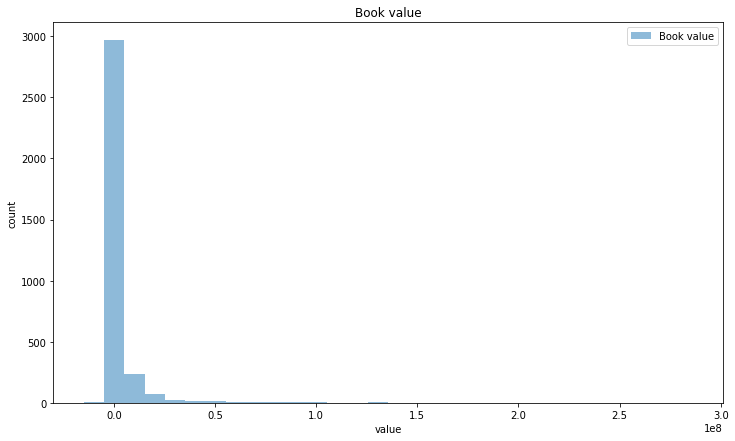

In [103]:
# us_2022_q2.info() # Looks like everything is in order... 

# There are some NULL values so we can use .dropna() to ignore them for now...
us_2022_q2.dropna()

plt.figure(figsize=(12,7))
us_2022_q2['Book value'].plot.hist( bins=30, alpha=0.5, title="Book value")
plt.xlabel("value")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.show()

In [104]:
# Taking a better look at describing the book values since the 
# histogram doesn't show the data clearly...
print(us_2022_q2['Book value'].describe())

print("\nMedian:", us_2022_q2['Book value'].median())
print("Mean:", us_2022_q2['Book value'].mean())

count    3.362000e+03
mean     3.331749e+06
std      1.386098e+07
min     -1.479100e+07
25%      1.060878e+05
50%      4.577370e+05
75%      1.792766e+06
max      2.861430e+08
Name: Book value, dtype: float64

Median: 457737.0
Mean: 3331748.585335812


**LOOKING AT THE DATA THAT WE GOT AND TAKING A LOOK ON THE GRAPH I CAN SAY THAT THERE ARE REALLY BIG BOOK VALUE SECTORS THAT LITERALLY GO BEYOND THE MEAN**

In [105]:
px.bar(us_2022_q2, x = 'Sector\nEconomatica', y = 'Book value', title = "Book values for each industry")

**PLOTTING AN HISTOGRAM OF THE BOOK VALUE OF THE MARKET VALUES...**

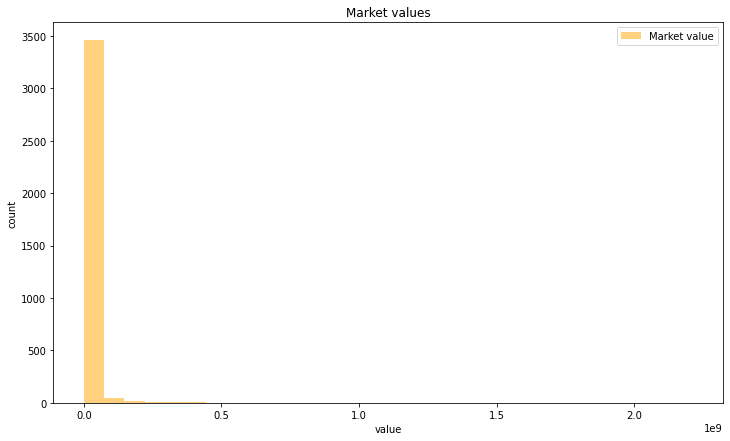

In [106]:
plt.figure(figsize=(12,7))
us_2022_q2['Market value'].plot.hist( bins=30, color="orange", alpha=0.5, title="Market values")
plt.xlabel("value")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.show()

In [107]:
# Taking a better look at describing the market values since the 
# histogram doesn't show the data clearly...
print(us_2022_q2['Market value'].describe())

print("\nMedian:", us_2022_q2['Market value'].median())
print("Mean:", us_2022_q2['Market value'].mean())

count    3.548000e+03
mean     1.095980e+07
std      6.632062e+07
min      3.490000e+01
25%      1.907523e+05
50%      1.105076e+06
75%      4.607257e+06
max      2.212838e+09
Name: Market value, dtype: float64

Median: 1105075.91083
Mean: 10959802.487230344


**LOOKING AT THE DATA THAT WE GOT AND TAKING A LOOK ON THE GRAPH, THE MARKET VALUES ARE A LOT MORE DIFFERENT THAN THE BOOK VALUES... FROM MY VIEW, ALL VALUES ARE HIGHER AND THERE'S MORE DISPERSION BETWEEN THE MARKET VALUES**

In [108]:
px.bar(us_2022_q2, x = 'Sector\nEconomatica', y = 'Market value', title="Market value graph for each firm")

* For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [109]:
px.box(us_2022_q2, x = 'Sector NAICS\nlevel 1', y= 'Profit margin')


* Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [110]:
# Getting the biggest 10 Market Values of the US Firms...
biggest_10_mk_v = us_2022_q2.sort_values("Market value", ascending = False).head(10)
biggest_10_mk_v

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,Book value,Market value,Operating profit,opm,Net income,Profit margin
809,AAPL,2022q2,82959000.0,47074000.0,12809000.0,0.0,-10000.0,0.0,3624000.0,336309000.0,...,NASDAQ,Electric Electron,Computer and Peripheral Equipment Manufacturing,6.056,58107000.0,2.212838e+09,23076000.0,0.278162,19452000.0,0.234477
191175,MSFT,2022q2,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,364840000.0,...,NASDAQ,Software & Data,Software Publishers,6.026,166542000.0,1.920840e+09,20534000.0,0.395912,16787000.0,0.323667
125851,GOOGL,2022q2,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,355185000.0,...,NASDAQ,Other,"Professional, Scientific, and Technical Services",2.149,255419000.0,1.435042e+09,19453000.0,0.279156,16441000.0,0.235933
18173,AMZN,2022q2,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,419728000.0,...,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,3.768,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109
289525,TSLA,2022q2,16934000.0,12700000.0,1628000.0,142000.0,18000.0,18000.0,205000.0,68513000.0,...,NASDAQ,Vehicle & Parts,Motor Vehicle Manufacturing,1.915,37237000.0,6.976698e+08,2464000.0,0.145506,2241000.0,0.132337
296815,UNH,2022q2,80332000.0,73200000.0,0.0,0.0,-129000.0,467000.0,1466000.0,230172000.0,...,NYSE,Finance and Insurance,Insurance Carriers,1.099,76205000.0,4.818731e+08,7132000.0,0.088782,5199000.0,0.064719
156887,JNJ,2022q2,24020000.0,7919000.0,9929000.0,85000.0,-273000.0,-26000.0,1026000.0,177724000.0,...,NYSE,Chemical,Pharmaceutical and Medicine Manufacturing,1.118,76357000.0,4.671001e+08,6087000.0,0.253414,5087000.0,0.211782
182535,META,2022q2,28822000.0,5192000.0,15272000.0,0.0,-172000.0,0.0,1499000.0,169779000.0,...,NASDAQ,Other,"Professional, Scientific, and Technical Services",2.007,125767000.0,4.363946e+08,8358000.0,0.289987,6859000.0,0.237978
205565,NVDA,2022q2,8288000.0,2857000.0,2210000.0,1353000.0,-13000.0,50000.0,187000.0,45212000.0,...,NASDAQ,Electric Electron,Semiconductor and Other Electronic Component M...,1.469,26320000.0,3.789750e+08,1868000.0,0.225386,1631000.0,0.196791
300325,V,2022q2,7275000.0,0.0,3127000.0,0.0,-208000.0,111000.0,418000.0,85410000.0,...,NYSE,Other,Business Support Services,1.012,35483000.0,3.743426e+08,4148000.0,0.570172,3619000.0,0.497457



* Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [111]:
# Getting the biggest 10 Book Values of the US Firms...
biggest_10_bk_v = us_2022_q2.sort_values("Book value", ascending = False).head(10)
biggest_10_bk_v

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,Book value,Market value,Operating profit,opm,Net income,Profit margin
157427,JPM,2022q2,18646000.0,3518000.0,0.0,0.0,-4263000.0,0.0,2216000.0,3.841314e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,1.331,286143000.0,3.302370e+08,15128000.0,0.811327,12912000.0,0.692481
34013,BAC,2022q2,14975000.0,2531000.0,0.0,0.0,-5552000.0,0.0,645000.0,3.111606e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.914,269118000.0,2.508107e+08,12444000.0,0.830985,11799000.0,0.787913
125851,GOOGL,2022q2,69685000.0,30104000.0,20128000.0,0.0,-439000.0,0.0,3012000.0,3.551850e+08,...,NASDAQ,Other,"Professional, Scientific, and Technical Services",2.149,255419000.0,1.435042e+09,19453000.0,0.279156,16441000.0,0.235933
49680,C,2022q2,15630000.0,3666000.0,0.0,0.0,-6235000.0,0.0,1182000.0,2.380904e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.375,199626000.0,8.906928e+07,11964000.0,0.765451,10782000.0,0.689827
319405,XOM,2022q2,111265000.0,76299000.0,6981000.0,7154000.0,3572000.0,194000.0,6359000.0,3.677740e+08,...,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,0.693,184508000.0,3.569164e+08,20831000.0,0.187220,14278000.0,0.128324
312205,WFC,2022q2,11556000.0,1358000.0,0.0,0.0,-6466000.0,0.0,613000.0,1.881142e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.540,179793000.0,1.484681e+08,10198000.0,0.882485,9585000.0,0.829439
191175,MSFT,2022q2,51865000.0,16429000.0,14902000.0,0.0,-47000.0,0.0,3747000.0,3.648400e+08,...,NASDAQ,Software & Data,Software Publishers,6.026,166542000.0,1.920840e+09,20534000.0,0.395912,16787000.0,0.323667
78332,CVX,2022q2,68762000.0,46321000.0,4563000.0,1759000.0,-80000.0,129000.0,4288000.0,2.579360e+08,...,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,0.566,154562000.0,2.833974e+08,16119000.0,0.234417,11702000.0,0.170181
277650,T,2022q2,29643000.0,12341000.0,11715000.0,631000.0,2212000.0,1502000.0,1509000.0,4.264330e+08,...,NYSE,Telecommunication,Wired Telecommunications Carriers,0.472,135307000.0,1.500526e+08,4956000.0,0.167190,1945000.0,0.065614
18173,AMZN,2022q2,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,4.197280e+08,...,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,3.768,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109


**2.2.1.2 Considering the whole history of financial data for all firms:**

* How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

**THE MEASURES CAN BE TAKEN PROBABLY WITH THE RELATION BETWEEN THE SALES AND THE FIRMS, IF SO, IT'S POSSIBLE TO FIND GOOD CORRELATION VALUES FROM THE PROFITS OR THE REVENUES**

In [112]:
# Measuring the performance among the firms on a profitability way could be get via a correlation function
# us_merged.columns
firms_profits = us_merged.corr()['Operating profit']
firms_profits

revenue              0.589684
cogs                 0.400980
sgae                 0.408224
otheropexp           0.089008
extraincome         -0.334447
finexp               0.376243
incometax            0.571073
totalassets          0.608279
totalliabilities     0.571247
shortdebt            0.397085
longdebt             0.593451
stockholderequity    0.743806
adjprice            -0.002079
originalprice        0.120425
sharesoutstanding    0.619968
fiscalmonth         -0.007204
year                -0.040876
cto                 -0.004961
N                   -0.022436
Book value           0.743873
Market value         0.689132
Operating profit     1.000000
opm                  0.004686
Net income           0.941835
Profit margin        0.004748
Name: Operating profit, dtype: float64

**I CAN CONCLUDE THAT THE REVENUE GETS US BIGGER CORRELATION VALUES BY OBSERVING THE FOLLOWING CODE:**

In [113]:
firms_revenues = us_merged.corr()['revenue']
firms_revenues

revenue              1.000000
cogs                 0.931408
sgae                 0.677615
otheropexp           0.333943
extraincome         -0.025453
finexp               0.379055
incometax            0.449182
totalassets          0.323492
totalliabilities     0.275417
shortdebt            0.291061
longdebt             0.378894
stockholderequity    0.595631
adjprice            -0.002771
originalprice        0.151463
sharesoutstanding    0.494759
fiscalmonth          0.003523
year                -0.055865
cto                  0.002382
N                   -0.016230
Book value           0.595626
Market value         0.615881
Operating profit     0.589684
opm                  0.005302
Net income           0.487594
Profit margin        0.005425
Name: revenue, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


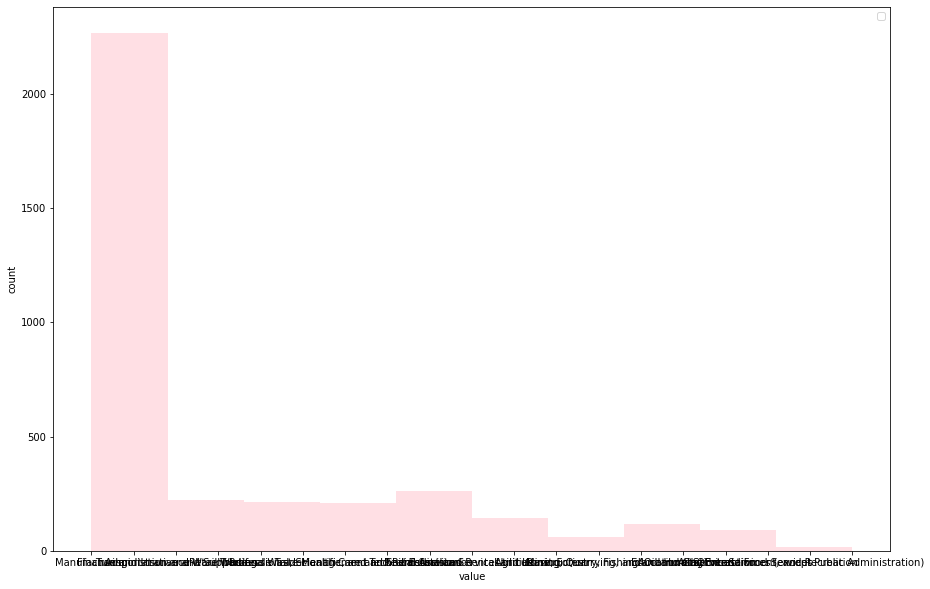

In [114]:
plt.figure(figsize=(15,10))
plt.hist(us_2022_q2['Sector NAICS\nlevel 1'], color="pink", alpha=0.5)
plt.xlabel("value")
plt.ylabel("count")
plt.legend(loc='upper right')
plt.show()


* Calculate and explain earnings per share deflated by price.

In [115]:
earnings_p_s = us_2022_q2["revenue"] # o 'Net income'?
earnings_p_s.sort_values( ascending = True )
earnings_p_s

89         1607000.0
179        3644000.0
269          10900.0
359       13422000.0
449          44669.0
             ...    
323455       45542.0
323545       51380.0
323635      284200.0
323725        2634.0
323815           0.0
Name: revenue, Length: 3600, dtype: float64

##### 2.2.2 About statistical modeling

* You have to select a group of firms according to their general industry classification:

    * Manufacturing industries

    * Commercial industries (retail and wholesale)

    * Service industries

    * Financial services

* Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

    * Do histograms for each factor/variables and interpret them

    * Do plots to visualize the possible relationship each factor might have with the dependent variable.

    * Show descriptive statistics of these factors

* Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

    * Your independent variables must be in the right scale so that you can compare the values of the variables among different firms of any size

    * For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

    * You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test
    
* Interpret your model

    * Interpret the results of each coefficient (beta and their statistical significance)

    * Interpret the R-squared of the model

* Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.
